In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# https://www.sympy.org/en/index.html
import sympy as sp

In [5]:
sp.init_printing()

## * Section 5.1  Orthonality in $ \mathbb{R}^n $

### Ex. 5.1 (p.369)

#### 使用 np.mat() 創建

In [6]:
v1 = np.mat([2, 1, -1]).T
v1
sp.Matrix(v1)

matrix([[ 2],
        [ 1],
        [-1]])

⎡2 ⎤
⎢  ⎥
⎢1 ⎥
⎢  ⎥
⎣-1⎦

In [7]:
v2 = np.mat([0, 1, 1]).T
sp.Matrix(v2)

⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣1⎦

In [8]:
v3 = np.mat([1, -1, 1]).T
sp.Matrix(v3)

⎡1 ⎤
⎢  ⎥
⎢-1⎥
⎢  ⎥
⎣1 ⎦

In [9]:
v1.T @ v2    # @ = np.dot() : dot product

matrix([[0]])

In [10]:
v2.T @ v3

matrix([[0]])

In [11]:
v3.T @ v1

matrix([[0]])

### Ex. 5.2 (p.370)

#### 使用 np.array() 創建

In [12]:
v1 = np.array([2, 1, -1])
sp.Matrix(v1)

⎡2 ⎤
⎢  ⎥
⎢1 ⎥
⎢  ⎥
⎣-1⎦

In [13]:
v2 = np.array([0, 1, 1])
sp.Matrix(v2)

⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣1⎦

In [14]:
np.cross(v1, v2)   # np.cross() : cross product

array([ 2, -2,  2])

In [15]:
v3 = np.cross(v1, v2) / 2
sp.Matrix(v3)

⎡1.0 ⎤
⎢    ⎥
⎢-1.0⎥
⎢    ⎥
⎣1.0 ⎦

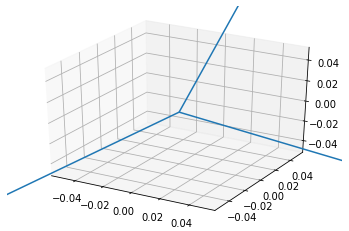

In [16]:
# https://stackoverflow.com/questions/47319238/python-plot-3d-vectors

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

origin = [0,0,0]
X, Y, Z = zip(origin,origin,origin) 
U, V, W = zip(v1, v2, v3)

# 標準畫法
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X,Y,Z,U,V,W, arrow_length_ratio=0.01)
plt.show()

### Ex. 5.4 (p.372)

Find the coordinates of 
$  
w = 
\left [
\begin{matrix}
1 \\
2 \\
3 \\
\end{matrix}
\right ]
$
with respect to the orthogonal basis $\beta = {v_{1}, v_{2}, v_{3}}$ of Example 5.1 and 5.2 

In [18]:
w = np.array([1, 2, 3])
sp.Matrix(w)

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

In [19]:
c1 = (w @ v1) / (v1 @ v1)
c1

In [20]:
c1 = sp.S(w @ v1)/ (v1 @ v1)
c1

In [21]:
c2 = sp.S(w @ v2) / (v2 @ v2)
c2

In [22]:
c3 = sp.S(w @ v3) / (v3 @ v3)
c3

In [23]:
sp.Matrix([c1, c2, c3])

⎡       1/6       ⎤
⎢                 ⎥
⎢       5/2       ⎥
⎢                 ⎥
⎣0.666666666666667⎦

### Ex. 5.5 (p.372)

Show that $S = {q_{1}, q_{2}}$ is an orthonormal set in $R^{3}$ if 
$  
q_{1} = 
\left [
\begin{matrix}
1 / \sqrt{3} \\
-1 / \sqrt{3}  \\
1 / \sqrt{3} \\
\end{matrix}
\right ]
$ and 
$  
q_{1} = 
\left [
\begin{matrix}
1 / \sqrt{6} \\
2 / \sqrt{6}  \\
1 / \sqrt{6} \\
\end{matrix}
\right ]
$


In [24]:
from math import *

In [25]:
q1 = np.array([1/sqrt(3), -1/sqrt(3), 1/sqrt(3)])
sp.Matrix(q1)

⎡0.577350269189626 ⎤
⎢                  ⎥
⎢-0.577350269189626⎥
⎢                  ⎥
⎣0.577350269189626 ⎦

In [26]:
q2 = np.array([1/sqrt(6), 2/sqrt(6), 1/sqrt(6)])
sp.Matrix(q2)

⎡0.408248290463863⎤
⎢                 ⎥
⎢0.816496580927726⎥
⎢                 ⎥
⎣0.408248290463863⎦

In [27]:
q1 @ q2

In [28]:
q1 @ q1

In [29]:
q2 @ q2

### Ex. 5.6 (p.373)

Construct an orhtonormal basis for $ R^{3}$ from the vectors in Example 5.1.

In [30]:
q1 = v1 / np.linalg.norm(v1)
q1

array([ 0.81649658,  0.40824829, -0.40824829])

In [31]:
q2 = v2 / np.linalg.norm(v2)
q2

array([0.        , 0.70710678, 0.70710678])

In [ ]:
q3 = v3 / np.linalg.norm(v3)
q3

## * Section 5.2  Orthogonal Complements and Orthogonal Projections

### Ex. 5.9 (p.380)

Find bases for the four fundamental subspaces of 
$
A=\left [
\begin{matrix}
1 & 1 & 3 & 1 & 6 \\
2 & -1 & 0 & 1 & -1  \\
-3 & 2 & 1 & -2 & 1 \\
4 & 1 & 6 & 1 & 3
\end{matrix}
\right ]
$ 
and verify Theorem 5.10.

In [32]:
A = sp.Matrix([[1, 1, 3, 1, 6], 
               [2, -1, 0, 1, -1],
               [-3, 2, 1, -2, 1],
               [4, 1, 6, 1, 3]])
A

⎡1   1   3  1   6 ⎤
⎢                 ⎥
⎢2   -1  0  1   -1⎥
⎢                 ⎥
⎢-3  2   1  -2  1 ⎥
⎢                 ⎥
⎣4   1   6  1   3 ⎦

In [33]:
A.rowspace()

[[1  1  3  1  6], [0  -3  -6  -1  -13], [0  0  0  2  8]]

In [34]:
A.nullspace()   # https://docs.sympy.org/latest/tutorial/matrices.html

⎡⎡-1⎤  ⎡1 ⎤⎤
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢-2⎥  ⎢-3⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢1 ⎥, ⎢0 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢0 ⎥  ⎢-4⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎣⎣0 ⎦  ⎣1 ⎦⎦

In [35]:
A.columnspace()

⎡⎡1 ⎤  ⎡1 ⎤  ⎡1 ⎤⎤
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢2 ⎥  ⎢-1⎥  ⎢1 ⎥⎥
⎢⎢  ⎥, ⎢  ⎥, ⎢  ⎥⎥
⎢⎢-3⎥  ⎢2 ⎥  ⎢-2⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣4 ⎦  ⎣1 ⎦  ⎣1 ⎦⎦

In [36]:
A.T.nullspace()

⎡⎡-1⎤⎤
⎢⎢  ⎥⎥
⎢⎢-6⎥⎥
⎢⎢  ⎥⎥
⎢⎢-3⎥⎥
⎢⎢  ⎥⎥
⎣⎣1 ⎦⎦

In [37]:
A.T.rref()   # rref() : reduced row echelon form

⎛⎡1  0  0  1⎤           ⎞
⎜⎢          ⎥           ⎟
⎜⎢0  1  0  6⎥           ⎟
⎜⎢          ⎥           ⎟
⎜⎢0  0  1  3⎥, (0, 1, 2)⎟
⎜⎢          ⎥           ⎟
⎜⎢0  0  0  0⎥           ⎟
⎜⎢          ⎥           ⎟
⎝⎣0  0  0  0⎦           ⎠

In [38]:
r = A.rref()[1]
r

### Ex. 5.10 (p.381)

Let W be the subspace of $R^{5}$ spanned by  
$
w_{1}=\left [
\begin{matrix}
1 \\
-3 \\
5 \\
0 \\
5 \\
\end{matrix}
\right ]
$, 
$
w_{2}=\left [
\begin{matrix}
-1 \\
1 \\
2 \\
-2 \\
3 \\
\end{matrix}
\right ]
$, 
$
w_{3}=\left [
\begin{matrix}
0 \\
-1 \\
4 \\
-1 \\
5 \\
\end{matrix}
\right ]
$

In [ ]:
A = sp.Matrix([[1, -1, 0], 
               [-3, 1, -1],
               [5, 2, 4],
               [0, -2, -1],
               [5, 3, 5]])
A

In [ ]:
A.columnspace()

In [ ]:
A.T.nullspace()

## * Section 5.3  The Gram-Schmidt Process and the QR Factorization

In [39]:
A = sp.Matrix([[1, 2, 2], 
               [-1, 1, 2],
               [-1, 0, 1],
               [1, 1, 2]])
A

⎡1   2  2⎤
⎢        ⎥
⎢-1  1  2⎥
⎢        ⎥
⎢-1  0  1⎥
⎢        ⎥
⎣1   1  2⎦

In [40]:
np.linalg.qr(A)

(array([[-5.00000000e-01, -6.70820393e-01,  4.08248290e-01],
        [ 5.00000000e-01, -6.70820393e-01,  1.00072696e-16],
        [ 5.00000000e-01, -2.23606798e-01, -4.08248290e-01],
        [-5.00000000e-01, -2.23606798e-01, -8.16496581e-01]]),
 array([[-2.        , -1.        , -0.5       ],
        [ 0.        , -2.23606798, -3.35410197],
        [ 0.        ,  0.        , -1.22474487]]))

In [41]:
Q = np.linalg.qr(A)[0]
sp.Matrix(Q)

⎡-0.5  -0.670820393249937   0.408248290463863  ⎤
⎢                                              ⎥
⎢0.5   -0.670820393249937  1.00072696249377e-16⎥
⎢                                              ⎥
⎢0.5   -0.223606797749979   -0.408248290463863 ⎥
⎢                                              ⎥
⎣-0.5  -0.223606797749979   -0.816496580927726 ⎦

In [42]:
R = np.linalg.qr(A)[1]
sp.Matrix(R)

⎡-2.0        -1.0               -0.5       ⎤
⎢                                          ⎥
⎢0.0   -2.23606797749979  -3.35410196624968⎥
⎢                                          ⎥
⎣0.0          0.0         -1.22474487139159⎦

In [43]:
Q.T @ A

⎡        -2.0                 -1.0               -0.5       ⎤
⎢                                                           ⎥
⎢5.55111512312578e-17   -2.23606797749979  -3.35410196624968⎥
⎢                                                           ⎥
⎣-1.11022302462516e-16          0          -1.22474487139159⎦

In [44]:
Q.T @ A - R

⎡          0            0            0          ⎤
⎢                                               ⎥
⎢5.55111512312578e-17   0  -8.88178419700125e-16⎥
⎢                                               ⎥
⎣-1.11022302462516e-16  0  4.44089209850063e-16 ⎦

## * Determine whether the given orthogonal set of vectors is orthogonal. If it is not, normalize the vectors to form an orthonormal set. 

$$
\left [
\begin{matrix}
\frac{1}{2}	 \\
\frac{1}{2}	  \\
\end{matrix}
\right ],
\left [
\begin{matrix}
\frac{1}{2}	 \\
\frac{-1}{2}	  \\
\end{matrix}
\right ]
$$

$$v_{i}\centerdot v_{j}$$

In [1]:
import numpy as np
import sympy as sp
sp.init_printing()
def IP(x,y):
    xx=x.T
    xy=np.dot(xx,y)
    return xy.item(0)

x=np.array([[0.5],
           [0.5]])
y=np.array([[0.5],
           [-0.5]])
IP(x,y)

$$ q_{i}=\frac{1}{\left| v_{i} \right|}v_{i} $$

In [3]:
x_unite = x / np.linalg.norm(x)
y_unite = y / np.linalg.norm(y)
sp.Matrix(x_unite)
sp.Matrix(y_unite)

⎡0.707106781186547 ⎤
⎢                  ⎥
⎣-0.707106781186547⎦

$$
\left [
\begin{matrix}
\frac{1}{2}	 \\
\frac{1}{2}	  \\
\frac{-1}{2}  \\
\frac{1}{2}	  \\
\end{matrix}
\right ],
\left [
\begin{matrix}
0	 \\
\frac{1}{3}	  \\
\frac{2}{3}  \\
\frac{1}{3}	  \\
\end{matrix}
\right ],
\left [
\begin{matrix}
\frac{1}{2}	 \\
\frac{-1}{6}	  \\
\frac{1}{6}  \\
\frac{-1}{6}	  \\
\end{matrix}
\right ]
$$

In [4]:
import numpy as np
import sympy as sp
sp.init_printing()

def IP(x,y):
    xx=x.T
    xy=np.dot(xx,y)
    return xy.item(0)

x=np.array([[0.5],
           [0.5],
           [-0.5],
           [0.5]])
y=np.array([[0],
           [1/3],
           [2/3],
           [1/3]])
z=np.array([[1/2],
           [-1/6],
           [1/6],
           [-1/6]])
IP(x,y)
IP(x,z)
IP(y,z)

In [5]:
x_unite = x / np.linalg.norm(x)
y_unite = y / np.linalg.norm(y)
z_unite = z / np.linalg.norm(z)
sp.Matrix(x_unite)
sp.Matrix(y_unite)
sp.Matrix(z_unite)

⎡0.866025403784438 ⎤
⎢                  ⎥
⎢-0.288675134594813⎥
⎢                  ⎥
⎢0.288675134594813 ⎥
⎢                  ⎥
⎣-0.288675134594813⎦

## * Fill in the missing entries of Q to make Q an orhtogonal matrix
$$
Q=
\left [
\begin{matrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}} & *  \\
0 & \frac{1}{\sqrt{3}} & *  \\
\frac{-1}{\sqrt{2}} & \frac{1}{\sqrt{3}} & * \\
\end{matrix}
\right ]
$$

Let $ x_{1}, x_{2}, x_{3} $ to be column vectors of A, in which
$
x_{1}=\left [
\begin{matrix}
\frac{1}{\sqrt{2}}	 \\
0	  \\
\frac{-1}{\sqrt{2}}  \\
\end{matrix}
\right ],
x_{2}=\left [
\begin{matrix}
\frac{1}{\sqrt{3}}	 \\
\frac{1}{\sqrt{3}}	  \\
\frac{1}{\sqrt{3}}  \\
\end{matrix}
\right ]
$, such  that $ x_{1}, x_{2}, x_{3} $ are linear independent:  
Let
$ x_{3}=\left [
\begin{matrix}
1	 \\
0	  \\
0  \\
\end{matrix}
\right ]
$ 
and Determine whether $ \det A $ equals 0.  
If $ \det A $ $\neq$ 0, then $ x_{1}, x_{2}, x_{3} $ are linear independent, and $x_{3} $ can be 
$
\left [
\begin{matrix}
1	 \\
0	  \\
0  \\
\end{matrix}
\right ]
$

In [6]:
import numpy as np
A=np.array([[1/np.sqrt(2),1/np.sqrt(3),1],
           [0,1/np.sqrt(3),0],
           [-1/np.sqrt(2),1/np.sqrt(3),0]])

det_A=np.linalg.det(A)

det_A==0

False

Let $v_{1}, v_{2}, v_{3} $ to be column vectors of Q, in which  $v_{1}=x_{1}, v_{2}=x_{2}$, such that Q is an orthogonal matrix.  
Given $
x_{1}=\left [
\begin{matrix}
\frac{1}{\sqrt{2}}	 \\
0	  \\
\frac{-1}{\sqrt{2}}  \\
\end{matrix}
\right ],
x_{2}=\left [
\begin{matrix}
\frac{1}{\sqrt{3}}	 \\
\frac{1}{\sqrt{3}}	  \\
\frac{1}{\sqrt{3}}  \\
\end{matrix}
\right ],
x_{3}=\left [
\begin{matrix}
1	 \\
0	  \\
0  \\
\end{matrix}
\right ]
$, 
all of which are in $ R^{3} $ and linear independent, according to the Gram-Schmidt Process, $ v_{3} $ can be found:
&nbsp;  
$ v1=x1, $  
$ v2=x1-(\frac{v_{1} \cdot x_{2}}{v_{1} \cdot v_{1}} )v_{1} $  
$ v3=x1-(\frac{v_{1} \cdot x_{3}}{v_{1} \cdot v_{1}} )v_{1}- (\frac{v_{2} \cdot x_{3}}{v_{2} \cdot v_{2}} )v_{2}$


In [7]:
import numpy as np
import sympy as sp
sp.init_printing()

def IP(x,y):
    xx=x.T
    xy=np.dot(xx,y)
    return xy.item(0)

def GS(X,b,n):
    v=[X]
    for i in range(0,len(b)):
        vv=b[i]
        for j in v:
            vv=vv-(IP(j,b[i])/IP(j,j))*j
        vv=vv / np.linalg.norm(vv)
        v.append(vv)
    return v[n]

x1=np.array([[1/np.sqrt(2)],
              [0],
              [-1/np.sqrt(2)]])
x2=np.array([[1/np.sqrt(3)],
              [1/np.sqrt(3)],
              [1/np.sqrt(3)]])
x3=np.array([[1],
             [0],
             [0]])
X=x1
b=[x2,x3]

v1=GS(X,b,0)
v2=GS(X,b,1)
v3=GS(X,b,2)

sp.Matrix(v3)

#v1=x1
#v2=x2-(IP(v1,x2)/IP(v1,v1))*v1
#v3=x3-(IP(v1,x3)/IP(v1,v1))*v1-(IP(v2,x3)/IP(v2,v2))*v2
#sp.Matrix(v3)

⎡0.408248290463863 ⎤
⎢                  ⎥
⎢-0.816496580927726⎥
⎢                  ⎥
⎣0.408248290463863 ⎦

In [8]:
Q=np.hstack((v1,v2,v3))
sp.Matrix(Q)

⎡0.707106781186547   0.577350269189626  0.408248290463863 ⎤
⎢                                                         ⎥
⎢       0.0          0.577350269189626  -0.816496580927726⎥
⎢                                                         ⎥
⎣-0.707106781186547  0.577350269189626  0.408248290463863 ⎦

### Find the upper triangle matrix R such that A = QR
$$
A=
\left [
\begin{matrix}
2 & 8 & 2  \\
1 & 7 & -1  \\
-2 & -2 & 1 \\
\end{matrix}
\right ],
Q=
\left [
\begin{matrix}
\frac{2}{3} & \frac{1}{3} & \frac{2}{3}  \\
\frac{1}{3} & \frac{2}{3} & \frac{-2}{3}  \\
\frac{-2}{3} & \frac{2}{3} & \frac{1}{3} \\
\end{matrix}
\right ]
$$  
$$ Q^{T}A=R $$

In [9]:
import numpy as np
import sympy as sp
sp.init_printing()

A=np.array([[2,8,2],
            [1,7,-1],
            [-2,-2,1]])
Q=np.array([[2,8,2],
           [1,7,-1],
           [-2,-2,1]])
R=Q.T@A

sp.Matrix(R)

⎡9   27   1⎤
⎢          ⎥
⎢27  117  7⎥
⎢          ⎥
⎣1    7   6⎦

## * Orthogonally diagonalize the matrices by finding an orhtogonal matrix Q and a diagonal matrix D such that $ Q^{T}AQ = D $

$
A=
\left [
\begin{matrix}
1 & 0 & -1  \\
0 & 1 & 0  \\
-1 & 0 & 1 \\
\end{matrix}
\right ]
$

In [10]:
import numpy as np
import sympy as sp
sp.init_printing()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

According to Theorem 4.23, A is diagonalizable if and only if A has n linearly independent eigenvectors. Then D=$ P^{-1} $$ A^{} $$ P^{} $, where the columns of P are eigenvectors of A, and the diagonal entries of D are eigenvalues of A.

Given the determinant of eigenvectors of A is not zero, the eigenvectors of A is linearly independent, and A is diagonalizable.

In [11]:
A = np.array([[1,0,-1],
              [0,1,0],
              [-1,0,1]])
eigenvector=np.linalg.eig(A)[1]
np.linalg.det(eigenvector)

According to Theorem 5.19, If A is a symmetric matrix, then any two eigenvectors corresponding to distinct eigenvalues of A are orthogonal

Given that A is symmetric matrix and all its eigenvalues are distinct, all the eigenvectors of A are orthogonal to each other.

In [12]:
sp.Matrix(A)

eigenvalue=np.linalg.eig(A)[0]
eigenvalue

⎡1   0  -1⎤
⎢         ⎥
⎢0   1  0 ⎥
⎢         ⎥
⎣-1  0  1 ⎦

array([2., 0., 1.])

Accoring to Theorem 5.5, A square matix Q is orthogonal if and only if $ Q^{-1}=Q^{T}$.  
Given D=$ P^{-1} $$ A^{} $$ P^{} $, where P is orthogonal, $ P^{-1}=P^{T}$ and D=$ P^{T} $$ A^{} $$ P^{} $

Make P be a orthogonal matrix, in which there is an orthogonal set of unit vector

In [13]:
eigenvector1=eigenvector[:,0].reshape(-1,1)
eigenvector2=eigenvector[:,1].reshape(-1,1)
eigenvector3=eigenvector[:,2].reshape(-1,1)

q1=eigenvector1 / np.linalg.norm(eigenvector1)
q2=eigenvector2 / np.linalg.norm(eigenvector2)
q3=eigenvector3 / np.linalg.norm(eigenvector3)

According to Definition, A square matirx A is orthogonally diagonalizable if there exists an orthogonal matrix Q and a diagonal matix D such that D=$ Q^{T} $$ A^{} $$ Q^{} $

Given ,D=$ P^{T} $$ A^{} $$ P^{} $, where P is orthogonal matrix and D is diagonal, matirx A is orthogonally diagonalizable

In [15]:
Q=np.hstack((q1,q2,q3))
D=Q.T@A@Q

sp.Matrix(Q)
sp.Matrix(D)

⎡0.707106781186548   0.707106781186548  0.0⎤
⎢                                          ⎥
⎢       0.0                 0.0         1.0⎥
⎢                                          ⎥
⎣-0.707106781186548  0.707106781186548  0.0⎦

⎡2.0  8.53284317717928e-17  0.0⎤
⎢                              ⎥
⎢0.0          0.0           0.0⎥
⎢                              ⎥
⎣0.0          0.0           1.0⎦

According to spectral decomposition,  A = $\lambda_{1}$$q_{1}$$q_{1}^{T}$ + ... + $\lambda_{n}$$q_{n}$$q_{n}^{T}$

In [17]:
l1=eigenvalue[0]
l2=eigenvalue[1]
l3=eigenvalue[2]
AA=l1*(q1 @ q1.T)+l2*(q2 @ q2.T)+l3*(q3 @ q3.T)

sp.Matrix(AA)

⎡1.0   0.0  -1.0⎤
⎢               ⎥
⎢0.0   1.0  0.0 ⎥
⎢               ⎥
⎣-1.0  0.0  1.0 ⎦